In [ ]:
import math
import random

# Estatistica descritiva
## Média

O calculo da média representa a soma de todos os itens de uma lista e divide os valores pelo tamanho de itens da lista

In [ ]:
def media(valores):
  soma = 0
  for valor in valores:
    soma += valor;
  return soma / len(valores)

## Mediana
A médiana é calculada pegando o valor que está no meio da lista, caso a lista seja impar a mediana é a posição central exatamente, caso o tamanho da lista seja par, o valor da mediana é a média dos dois valores ao centro

In [ ]:
def mediana(valores):
  valores.sort()
  index_central = len(valores)//2
  if len(valores)%2 == 0:
    lista_central = [valores[index_central - 1], valores[index_central]]
    return media(lista_central)
  else:
    return valores[index_central]

## Moda
A moda é o valor que mais aparece em uma lista, a melhor forma de calcular a moda é primeiro determinar a frequencia de cada item, apartir dai é possivel que uma lista seja monomodal (uma moda), bimodal (duas modas), multimodal (muitas modas), ou sem moda, para ela ser considerada sem moda nenhum dos itens da lista pode se repetir, isso é, a frequencia de todos os itens é 1, caso a frequencia seja maior que um a lista já tem alguma moda

In [ ]:
def moda(valores):

  frequencias = {}
  for valor in valores:
    if valor in frequencias:
      frequencias[valor] += 1
    else:
      frequencias[valor] = 1

  moda = []

  max_frequencia = 0
  for num, frequencia in frequencias.items():
    if frequencia > max_frequencia:
      max_frequencia = frequencia
      moda = []
      moda.append(num)
    elif frequencia == max_frequencia:
      moda.append(num)

  if max_frequencia == 1:
    return []
  else:
    return moda

## Desvio Padrão

O desvio padrão representa o quanto os valores da lista estão longe ou perto da média, ele é calculado pela seguinte formula:

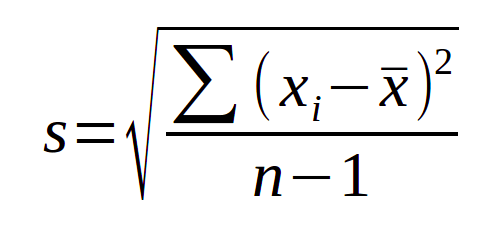

Que representa a somatória dos itens menos a média dividido pelo numero de itens menos 1, tudo isso ao quadrado

In [ ]:
def variancia(valores):
  val_media = media(valores)

  soma_quadrados = 0

  for valor in valores:
    soma_quadrados += (valor - val_media) ** 2

  return soma_quadrados / (len(valores) - 1)

def desvio_padrao(valores):
  return math.sqrt(variancia(valores))

In [ ]:
def divide_lista(valores):
  valores.sort()
  index_central = len(valores)//2
  if len(valores)%2 == 0:
    return [valores[:index_central-1],valores[index_central+1:]]
  else:
    return [valores[:index_central],valores[index_central+1:]]

In [ ]:
dados = [14,4,11,20,6,18,15,19,14,9,7,9,2,12,1,9,8,8,6,20]

In [ ]:
[[11416076, 40101950, 11667250, 65510053, 22126530],[212994,656000,236.318,1450382,454588]]


In [ ]:
def quartis(valores):
  valores_divididos = divide_lista(valores)
  return [mediana(valores_divididos[0]),mediana(valores),mediana(valores_divididos[1])]

In [ ]:
quartis(dados)

[6, 9.0, 15]

# Teste Z

Suposição: "A duração média é igual a 1.570 horas".

In [ ]:
import csv
duracao = []
with open('/content/experimento_duraccao.csv',) as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        duracao.append(float(row[1]))
duracao

[1541.121473776273,
 1523.4953293328665,
 1521.732707443278,
 1523.2800913095082,
 1530.6433736016138,
 1516.6657943260795,
 1540.3655251042587,
 1529.607004096196,
 1531.108607839882,
 1523.4879557947793,
 1525.1436064717811,
 1538.6801556030846,
 1535.641873470491,
 1529.809188176167,
 1516.192904738845,
 1546.2980355960492,
 1522.9907396393542,
 1537.8760742726467,
 1523.73661701157,
 1520.1317174447095,
 1528.6068886742426,
 1524.98025747465,
 1525.8922476764883,
 1531.4468870044761,
 1539.1589924981704,
 1523.1367185811628,
 1540.3938475372772,
 1551.798841941055,
 1523.6863879663342,
 1546.0577411187896,
 1540.5731989804453,
 1534.6433259600783,
 1515.619184168428,
 1529.0182414563749,
 1517.29018299041,
 1537.1241157498737,
 1534.6300632281618,
 1546.5458637384925,
 1533.6700518257123,
 1530.350398966893,
 1528.0244386286843,
 1536.4118504713103,
 1524.1736408412069,
 1528.5205427151964,
 1515.2070313357647,
 1514.7807714437265,
 1538.9982925905724,
 1532.349927959576,
 1519.067

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
stats, p_valor = ztest(x1 = duracao, value = 1570, alternative = "two-sided")

In [ ]:
p_valor

0.0

In [ ]:
if p_valor < 0.05:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"

print("Conclusão:", conclusao)

Conclusão: Rejeitar a hipótese nula


# Teste T

Será que o tempo médio do suporte é igual a 30 minutos ou menor que 30 minutos? A partir desse par de hipóteses, definido nos passos anteriores, podemos analisar qual foi a média de resposta de suporte observada. Para isso, vamos usar a variável tempo_resposta em uma nova célula.

In [ ]:
tempo_resposta = [28, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 24, 29, 30]

In [ ]:
media(tempo_resposta)

29.96

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
stats, p_valor = ttest_1samp(tempo_resposta, 20, alternative = "greater")

In [ ]:
print(p_valor)

1.8702750949556622e-19


In [ ]:
nivel_significancia = 0.05

if p_valor < nivel_significancia:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"

conclusao

'Não rejeita a hipótese nula'

# Teste T Independente

a propaganda produz um efeito positivo nas vendas? Colocar anúncios aumenta nossas vendas no e-commerce? Essa é a nossa hipótese. Acreditamos que os anúncios aumentam as vendas. Ao analisarmos isso, precisamos entender como vamos comparar e testar essa hipótese.

In [ ]:
vendas_com_propaganda = [329.80, 291.70, 338.86, 391.38, 285.95, 285.95, 394.75, 346.05, 271.83, 332.55, 272.19, 272.06, 314.52, 185.20, 196.50, 266.26, 239.23, 318.85, 245.52, 215.26, 387.94, 286.45, 304.05, 214.52, 267.34, 306.66, 230.94, 322.54, 263.96, 282.50, 263.90, 411.14, 299.19, 236.54, 349.35, 226.75, 312.53, 182.42, 220.31, 311.81, 344.31, 310.28, 293.66, 281.93, 211.29, 256.81, 272.36, 363.43, 320.62, 194.22]

In [ ]:
vendas_sem_propaganda = [304.44, 261.89, 244.38, 321.70, 346.86, 348.08, 234.65, 266.45, 304.88, 343.53, 256.25, 273.86, 218.62, 213.23, 333.75, 366.37, 280.68, 345.21, 306.70, 246.29, 306.68, 377.28, 282.85, 378.88, 127.82, 334.31, 290.22, 267.06, 290.51, 165.74, 271.82, 306.43, 373.67, 253.90, 236.49, 254.89, 339.92, 304.73, 253.21, 315.80, 292.80, 343.12, 242.88, 265.34, 261.47, 197.19, 302.77, 300.66, 285.31, 270.92]

In [ ]:
media(vendas_com_propaganda)

286.4832

In [ ]:
media(vendas_sem_propaganda)

286.24979999999994

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
stats, p_valor = ttest_ind (vendas_com_propaganda, vendas_sem_propaganda, alternative = "greater")

In [ ]:
alpha = 0.05
if p_valor < alpha:
    print("Rejeitar a hipótese nula: Há evidências de que a propaganda tem um efeito positivo nas vendas.")
else:
    print("Não rejeita hipótese nula: Não há evidências suficientes para afirmar um efeito positivo nas vendas devido à propaganda.")

Não rejeita hipótese nula: Não há evidências suficientes para afirmar um efeito positivo nas vendas devido à propaganda.


# Teste T dependente

Notas antes e depois do treinamento

In [ ]:
antes_do_treinamento =[78, 65, 75, 80, 85, 88, 79, 81, 76, 84]
apos_o_treinamento = [85, 70, 75, 87, 90, 92, 84, 82, 76, 91]

In [ ]:
resultado_subtracao = [b - a for a, b in zip(antes_do_treinamento,apos_o_treinamento)]
resultado_subtracao

[7, 5, 0, 7, 5, 4, 5, 1, 0, 7]

In [ ]:
from scipy.stats import ttest_rel

H0 antes do treinamento < apos o treinamento

H1 antes do treinamento > apos o treinamento

In [ ]:
stats, p_valor = ttest_rel(apos_o_treinamento, antes_do_treinamento, alternative="greater")

# Qui Quadrado


In [ ]:
from scipy.stats import chi2_contingency

# Dados (tabela de contingência)
observed = [[67, 74, 45, 34, 44], [21, 12, 32, 32, 21]]  # Frequência observada

# Teste de hipóteses
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

print("Estatística Qui-Quadrado:", chi2_stat)
print("Valor p:", p_value)

Estatística Qui-Quadrado: 27.327907072775968
Valor p: 1.7063631121089738e-05


In [ ]:

from scipy.stats import chi2_contingency

# Dados (tabela de contingência)
observed = [[11416076, 40101950, 11667250, 65510053, 22126530],[212994,656000,236318,1450382,454588]]  # Frequência observada

# Teste de hipóteses
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

print("Estatística Qui-Quadrado:", chi2_stat)
print("Valor p:", p_value)

Estatística Qui-Quadrado: 42276.55681191326
Valor p: 0.0


In [ ]:
mais_ricos = [113,89,58,37,7,33,40,24,0,21,46,17,4,5,13,13,1,9,7,2,7,2,4,4,3,6,8,4,0,11,2,3,5,0,64,0,0,0,7,4,20,0,4,8,0,20,19,0,3,1,15,4,1,4,1,10,3,4,0,5,0]


In [ ]:
menos_ricos = [2,6,1,0,0,0,0,1,7,0,5,8,1,0,5,9,0,2,1,7,0,2,4,0,1,0,0,0,0,0,0,0,8,20,1,0,0,0,9,0,4,4,1,1,1,3,2,1,0,0,0,2,0,0,0,0,3,0,1,0,0]


H0 = Menos ricos < Mais ricos

H1 = Menos ricos > Mais ricos


In [ ]:
from scipy.stats import ttest_ind
stats, p_valor = ttest_ind (menos_ricos, mais_ricos, alternative = "greater")



In [ ]:
print(p_valor)

0.9999307106551164


In [ ]:
qualidade_antes = [88,90,89,80,84,99]
qualidade_depois = [80,80,97,86,96,92]

H0 = qualidade_antes > qualidade_depois

H1 = qualidade_antes < qualidade_depois

In [ ]:
from scipy.stats import ttest_rel

stats, p_valor = ttest_rel(qualidade_antes, qualidade_depois, alternative="less")

In [ ]:
print(p_valor)

0.48379287661390913
